## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [1]:
# If you didn't download it yet, please get the relevant file now!
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

--2022-11-30 10:41:34--  https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: /s/raw/xvjzaxzz3ysphme/data_000637.txt [segue]
--2022-11-30 10:41:35--  https://www.dropbox.com/s/raw/xvjzaxzz3ysphme/data_000637.txt
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://uc3c275faac41d848f979d68770c.dl.dropboxusercontent.com/cd/0/inline/BxsBnCpCCDOJjz7Hqh7boR_MmrPFVXSdF-qxML_FeZjcnhr0S-iAKqtDq2k-ZLDwKXoV2MOzY-Ype-Q7-IU-gRw9N5dgkMMUneEX0x-9xm_0Lz_9uHaQs0JkAY1dzc4MmizJaGKQBp8bYAoJn5J_Uqt0mhSLuRq6fIper8bE9kbsiw/file# [segue]
--2022-11-30 10:41:36--  https://uc3c275faac41d848f979d68770c.dl.dropboxusercontent.com/cd/0/inline/BxsBnCpCCDOJjz7Hqh7boR_MmrPFVXSdF-qxML_FeZ

In [23]:
import pandas as pd
import numpy as np

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

In [58]:
N=1310720
df = pd.read_csv('~/data/data_000637.txt', nrows=N)
df.describe()

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
count,1310720.0,1.310720e+06,1.310720e+06,1.310720e+06,1.310720e+06,1.310720e+06
mean,1.0,2.959198e-01,5.582570e+01,3.869206e+09,1.781096e+03,1.332340e+01
std,0.0,4.564553e-01,3.901034e+01,3.183124e+03,1.027795e+03,9.199886e+00
min,1.0,0.000000e+00,1.000000e+00,3.869200e+09,0.000000e+00,0.000000e+00
25%,1.0,0.000000e+00,2.600000e+01,3.869203e+09,8.930000e+02,5.000000e+00
50%,1.0,0.000000e+00,5.700000e+01,3.869207e+09,1.778000e+03,1.300000e+01
75%,1.0,1.000000e+00,6.400000e+01,3.869209e+09,2.670000e+03,2.100000e+01
max,1.0,1.000000e+00,1.390000e+02,3.869211e+09,3.563000e+03,2.900000e+01


In [59]:
df.head(15)

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
5,1,0,63,3869200167,2762,4
6,1,0,61,3869200167,2772,14
7,1,0,139,3869200167,2776,0
8,1,0,62,3869200167,2774,21
9,1,0,60,3869200167,2788,7


2\. Find out the number of BX in a ORBIT (the value 'x').

We know that 30 TDC_MEAS = 1 BX_COUNTER, we want to know the conversion between ORBIT and BX. Statistically we would assume that over the milion entries of the data set the maximum value for BX_COUNTER would occur at least once. So, taking the maximum value for BX +1 it's a safe bet

In [62]:
x = df.BX_COUNTER.max() + 1
print(x)

3564


3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

Coverting the counting in nanoseconds, calculating the difference between the maximum and minimum values

In [65]:
df['TIME'] = df.TDC_MEAS*25/30 + df.BX_COUNTER*25 + df.ORBIT_CNT*x
time_mes = (df.TIME.max() - df.TIME.min())*10**(-9)
print(time_mes, 'sec')

0.039299134666015624 sec


In [95]:
len(df.HEAD)

1310720

5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

In [121]:
df.HEAD = np.random.randint(0, 2, size=len(df.HEAD))
df.describe()

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TIME
count,1.310720e+06,1.310720e+06,1.310720e+06,1.310720e+06,1.310720e+06,1.310720e+06,1.310720e+06
mean,4.994652e-01,2.959198e-01,5.582570e+01,3.869206e+09,1.781096e+03,1.332340e+01,1.378985e+13
std,4.999999e-01,4.564553e-01,3.901034e+01,3.183124e+03,1.027795e+03,9.199886e+00,1.134448e+07
min,0.000000e+00,0.000000e+00,1.000000e+00,3.869200e+09,0.000000e+00,0.000000e+00,1.378983e+13
25%,0.000000e+00,0.000000e+00,2.600000e+01,3.869203e+09,8.930000e+02,5.000000e+00,1.378984e+13
50%,0.000000e+00,0.000000e+00,5.700000e+01,3.869207e+09,1.778000e+03,1.300000e+01,1.378985e+13
75%,1.000000e+00,1.000000e+00,6.400000e+01,3.869209e+09,2.670000e+03,2.100000e+01,1.378986e+13
max,1.000000e+00,1.000000e+00,1.390000e+02,3.869211e+09,3.563000e+03,2.900000e+01,1.378987e+13


6\. Create a new DataFrame that contains only the rows with HEAD=1.

In [123]:
df2 =df.groupby('HEAD').get_group(1)
df2.describe()

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TIME
count,654659.0,654659.000000,654659.000000,6.546590e+05,654659.000000,654659.000000,6.546590e+05
mean,1.0,0.294827,55.824124,3.869206e+09,1782.621172,13.312942,1.378985e+13
std,0.0,0.455965,38.961906,3.182249e+03,1028.718945,9.197031,1.134134e+07
min,1.0,0.000000,1.000000,3.869200e+09,0.000000,0.000000,1.378983e+13
25%,1.0,0.000000,26.000000,3.869203e+09,893.000000,5.000000,1.378984e+13
50%,1.0,0.000000,57.000000,3.869207e+09,1779.000000,13.000000,1.378985e+13
75%,1.0,1.000000,64.000000,3.869209e+09,2673.000000,21.000000,1.378986e+13
max,1.0,1.000000,139.000000,3.869211e+09,3563.000000,29.000000,1.378987e+13


7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

In [124]:
import matplotlib.pyplot as plt

In [162]:
fpga0 = df2[df2.FPGA==0].groupby('TDC_CHANNEL').sum()
fpga1 = df2[df2.FPGA==1].groupby('TDC_CHANNEL').sum()

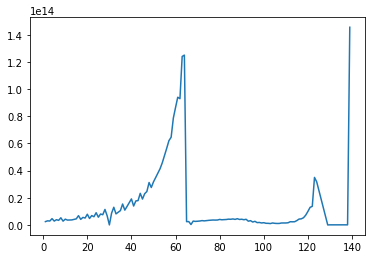

In [163]:
plt.plot(fpga0.index, fpga0.ORBIT_CNT)
plt.show()

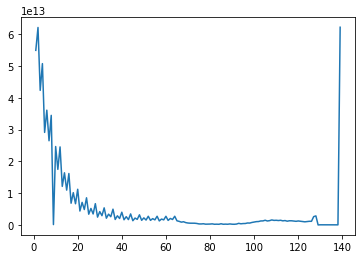

In [166]:
plt.plot(fpga1.index, fpga1.ORBIT_CNT)
plt.show()

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139